In [1]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


8


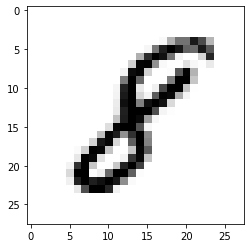

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
image_index = 7777 
print(y_train[image_index]) 
plt.imshow(x_train[image_index], cmap='Greys')

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [5]:
# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 28)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4732)              0         
                                                                 
 dense (Dense)               (None, 128)               605824    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

In [ ]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0166 - accuracy: 0.9941
Epoch 2/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0144 - accuracy: 0.9948
Epoch 3/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0142 - accuracy: 0.9951
Epoch 4/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0146 - accuracy: 0.9953
Epoch 5/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0126 - accuracy: 0.9957
Epoch 6/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0121 - accuracy: 0.9961
Epoch 7/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0111 - accuracy: 0.9961
Epoch 8/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.0125 - accuracy: 0.9959
Epoch 9/10
1875/1875 [==============================] - 37s 19ms/step - loss: 0.0112 - accuracy: 0.9964
Epoch 10/10
1875/1875 [==============================] - 34s 18m

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.0740 - accuracy: 0.9843


[0.07401426136493683, 0.9843000173568726]

1/1 [==============================] - 0s 55ms/step
9


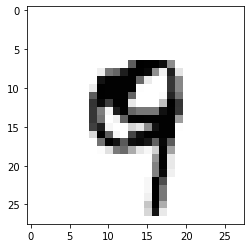

In [ ]:
image_index = 4444
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

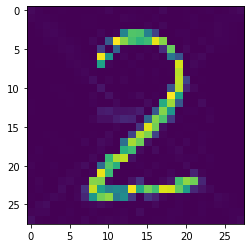

In [ ]:
from PIL import Image
import numpy as np

orig_color = (255,255,255)
replacement_color = (0,0,0)
img = Image.open("2.jpg").convert('RGB')
data = np.array(img)
data[(data == orig_color).all(axis = -1)] = replacement_color
img2 = Image.fromarray(data, mode='RGB')
img2.show()

img = img2.convert('L')
img = img.resize((28, 28), Image.ANTIALIAS)
imgarr = np.array(img)
imgarr = imgarr / 255.

plt.imshow(imgarr)
plt.show()

In [ ]:
print(img)
img = np.array([imgarr])
print(img.shape)

<PIL.Image.Image image mode=L size=28x28 at 0x7F0D17ECDE20>
(1, 28, 28)


In [ ]:
predictions_single = model.predict(img.reshape(1, 28, 28, 1))
print(predictions_single)

1/1 [==============================] - 0s 20ms/step
[[3.5062472e-17 3.5971807e-06 9.9999642e-01 5.0279025e-13 4.7840309e-18
  6.4382239e-20 1.4936643e-18 3.3560309e-14 1.5992362e-12 2.3823418e-23]]


In [ ]:
print(predictions_single.argmax())

2


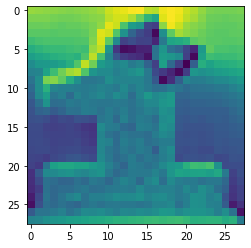

In [ ]:
orig_color = (255,255,255)
replacement_color = (0,0,0)
img = Image.open("1.jpg").convert('RGB')
data = np.array(img)
data[(data == orig_color).all(axis = -1)] = replacement_color
img2 = Image.fromarray(data, mode='RGB')
img2.show()

img = img2.convert('L')
img = img.resize((28, 28), Image.ANTIALIAS)
imgarr = np.array(img)
imgarr = imgarr / 255.

plt.imshow(imgarr)
plt.show()

In [ ]:
print(img)
img = np.array([imgarr])
print(img.shape)

<PIL.Image.Image image mode=L size=28x28 at 0x7F0D181F9E50>
(1, 28, 28)


In [ ]:
predictions_single = model.predict(img.reshape(1, 28, 28, 1))
print(predictions_single)

1/1 [==============================] - 0s 19ms/step
[[1.1366071e-04 1.2881909e-01 8.9794595e-04 1.8745026e-02 6.7763839e-09
  5.2071722e-05 1.2060829e-11 8.5137206e-01 1.4840103e-12 1.2919801e-07]]


In [ ]:
print(predictions_single.argmax())

7
